In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16504 entries, 0 to 16503
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Period Code  16475 non-null  object
 1   Cycle ID     16468 non-null  object
 2   B_2          16464 non-null  object
 3   B_3          16460 non-null  object
 4   B_4          16462 non-null  object
 5   B_5          16469 non-null  object
 6   B_9          16475 non-null  object
 7   B_10         16460 non-null  object
 8   B_14         16460 non-null  object
 9   B_15         16458 non-null  object
 10  B_16         16467 non-null  object
 11  B_17         16463 non-null  object
 12  B_18         16469 non-null  object
 13  B_19         16467 non-null  object
 14  B_20         16464 non-null  object
 15  B_21         16475 non-null  object
 16  B_22         16477 non-null  object
 17  B_23         16473 non-null  object
 18  B_24         16463 non-null  object
 19  B_25         16467 non-nu

In [2]:
to_remove_lst = ['Bad', 'I/O', 'Missing', 'no connection', 'No Data', 'no response',
       'start', 'stop']
df = df[df['Period Code'].isin(to_remove_lst) == False]
df = df[df['Cycle ID'].isin(to_remove_lst)==False]
df = df[df['Good/Bad'].isin(to_remove_lst)==False]
df = df[df['timestamp'].isin(to_remove_lst)==False]
df = df.dropna(subset=['Period Code', 'Cycle ID', 'Good/Bad'])

In [3]:
sensor_columns = ['B_2', 'B_3', 'B_4', 'B_5', 'B_9', 'B_10',
                  'B_14', 'B_15', 'B_16', 'B_17', 'B_18', 
                  'B_19', 'B_20', 'B_21', 'B_22','B_23', 'B_24', 'B_25']
for each_col in sensor_columns:
    df.loc[df[each_col].isin(to_remove_lst), each_col] = np.nan
    df[each_col] = df[each_col].astype(np.float64)

In [4]:
df[sensor_columns].corr()

,B_2,B_3,B_4,B_5,B_9,B_10,B_14,B_15,B_16,B_17,B_18,B_19,B_20,B_21,B_22,B_23,B_24,B_25
B_2,1.000000,0.011160,NaN,NaN,NaN,-0.000980,NaN,0.013630,-0.001952,0.000808,0.000812,0.003055,NaN,0.007820,NaN,NaN,-0.004435,-0.016141
B_3,0.011160,1.000000,NaN,NaN,NaN,0.019516,NaN,0.012736,-0.011543,0.020142,-0.017014,0.008782,NaN,0.014026,NaN,NaN,-0.007804,-0.011612
B_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B_10,-0.000980,0.019516,NaN,NaN,NaN,1.000000,NaN,0.165104,-0.161732,0.159031,-0.003511,0.152095,NaN,0.137826,NaN,NaN,-0.145944,-0.139580
B_14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B_15,0.013630,0.012736,NaN,NaN,NaN,0.165104,NaN,1.000000,-0.847403,0.782739,0.151280,0.783896,NaN,0.723860,NaN,NaN,-0.771684,-0.775775
B_16,-0.001952,-0.011543,NaN,NaN,NaN,-0.161732,NaN,-0.847403,1.000000,-0.790201,-0.083948,-0.766358,NaN,-0.703179,NaN,NaN,0.752218,0.756511
B_17,0.000808,0.020142,NaN,NaN,NaN,0.159031,NaN,0.782739,-0.790201,1.000000,-0.156789,0.697791,NaN,0.629818,NaN,NaN,-0.686848,-0.691447


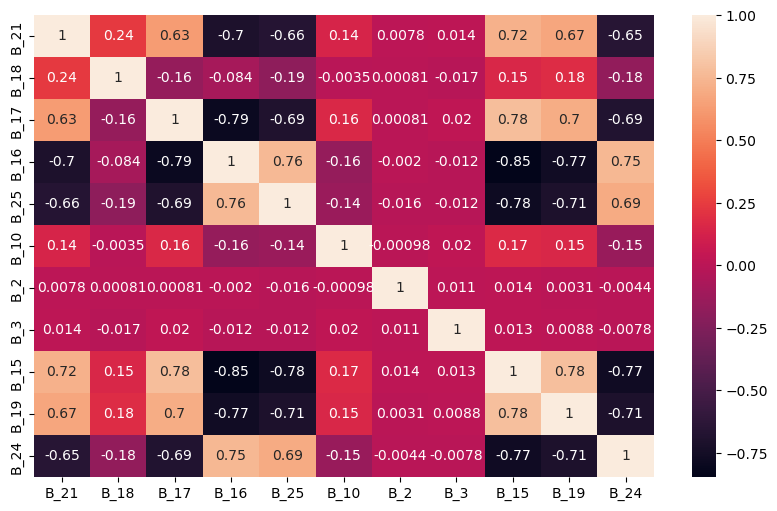

In [5]:
same_val_lst = ['B_4','B_5','B_9','B_14','B_20','B_22','B_23']
df = df.drop(axis=1, columns=same_val_lst)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df[list(set(sensor_columns) - set(same_val_lst))].corr(), annot=True)
plt.show()

In [6]:
df.columns

Index(['Period Code', 'Cycle ID', 'B_2', 'B_3', 'B_10', 'B_15', 'B_16', 'B_17',
       'B_18', 'B_19', 'B_21', 'B_24', 'B_25', 'Good/Bad', 'timestamp'],
      dtype='object')

In [7]:
for col in df.columns[:-2]:
    df[col] = df[col].fillna(df.groupby('Period Code')[col].transform('mean'))

In [8]:
len(df)

15581

In [9]:
df = df.drop(['Period Code', 'Cycle ID', 'timestamp'], axis=1)
df['Good/Bad'] = df['Good/Bad'].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15581 entries, 0 to 16503
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   B_2       15581 non-null  float64
 1   B_3       15581 non-null  float64
 2   B_10      15581 non-null  float64
 3   B_15      15581 non-null  float64
 4   B_16      15581 non-null  float64
 5   B_17      15581 non-null  float64
 6   B_18      15581 non-null  float64
 7   B_19      15581 non-null  float64
 8   B_21      15581 non-null  float64
 9   B_24      15581 non-null  float64
 10  B_25      15581 non-null  float64
 11  Good/Bad  15581 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 1.5 MB


In [11]:
list(df.columns)

['B_2',
 'B_3',
 'B_10',
 'B_15',
 'B_16',
 'B_17',
 'B_18',
 'B_19',
 'B_21',
 'B_24',
 'B_25',
 'Good/Bad']

In [12]:
cols_to_choose = list(df.columns[:-1])

def pre_process_test_data(df, cols_to_choose):
    to_remove_lst = ['Bad', 'I/O', 'Missing', 'no connection', 'No Data', 'no response', 'start', 'stop']
    for each_col in cols_to_choose:
        df.loc[df[each_col].isin(to_remove_lst), each_col] = np.nan
        df[each_col] = df[each_col].astype(np.float64)
        df[each_col] = df[each_col].fillna(df.groupby('Period Code')[each_col].transform('mean'))
    return df

test_df_final = pre_process_test_data(test_df, cols_to_choose)
test_df_final = test_df_final[cols_to_choose]
test_df_final.head()

,B_2,B_3,B_10,B_15,B_16,B_17,B_18,B_19,B_21,B_24,B_25
0,0.0025,0.0005,21.61,47.29,521.940000,2388.07,8131.50,8.4200,393.170213,39.04,23.3814
1,-0.0003,-0.0003,21.61,47.07,522.610000,2387.95,8148.76,8.4058,392.000000,39.17,23.3801
2,-0.0004,-0.0005,21.61,47.36,521.177467,2388.02,8139.39,8.4304,393.000000,38.91,23.3250
3,0.0021,0.0001,21.61,47.61,521.180000,2388.07,8138.06,8.4300,392.000000,38.81,23.4180
4,0.0018,0.0001,21.61,47.21,522.640000,2387.99,8144.86,8.4063,392.000000,39.09,23.2883


In [13]:
from sklearn.model_selection import train_test_split  

x = df[df.columns[:-1]]
y = df[df.columns[-1]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

dt_auc = []
rf_auc = []

for i in range(3, 11):
    dt = DecisionTreeClassifier(max_depth=i)
    rf = RandomForestClassifier(max_depth=i)
    dt_model = dt.fit(x_train, y_train)
    rf_model = rf.fit(x_train, y_train)
    y_pred = dt_model.predict(x_test)
    y_pred2 = rf_model.predict(x_test)

    dt_auc.append(roc_auc_score(y_test, y_pred))
    rf_auc.append(roc_auc_score(y_test, y_pred2))


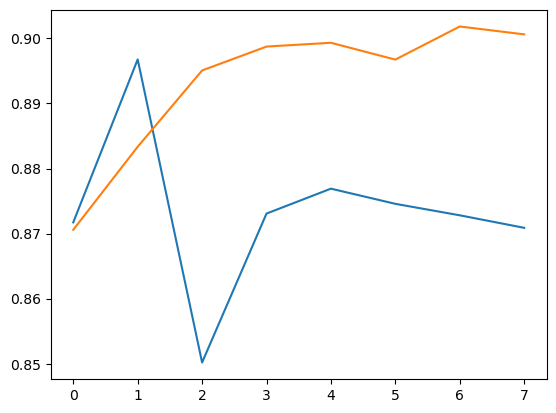

In [15]:
import matplotlib.pyplot as plt
plt.plot(dt_auc)
plt.plot(rf_auc)

In [16]:
max(rf_auc)

0.9018355753255801

In [17]:
import xgboost as xgb

In [18]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [19]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( x_train, y_train), ( x_test, y_test)]
    
    clf.fit(x_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(x_test)
    accuracy = roc_auc_score(y_test, (pred>0.5).astype(int))
    return {'loss': -accuracy, 'status': STATUS_OK }

In [20]:
import warnings

warnings.filterwarnings("ignore")

trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

100%|██████████████████| 100/100 [00:09<00:00, 10.55trial/s, best loss: -0.8919725958875967]


In [21]:
best_hyperparams

{'colsample_bytree': 0.6295560686843565,
 'gamma': 2.309408816229935,
 'max_depth': 8.0,
 'min_child_weight': 5.0,
 'reg_alpha': 41.0,
 'reg_lambda': 0.5390477776165232}

In [22]:
xgb_model = xgb.XGBClassifier(colsample_bytree = 0.6615957423072196,
 gamma = 1.7558695555114365,
 max_depth = 14,
 min_child_weight = 5,
 reg_alpha = 40,
 reg_lambda = 0.6383809585467258)
xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)

roc_auc_score(y_test, (y_pred_xgb>0.5).astype(int))

0.9002313450167033

In [23]:
model_grid = RandomForestClassifier()
model_grid.fit(x_train, y_train) 
y_pred_grid = model_grid.predict(x_test) 
print(roc_auc_score(y_test, y_pred_grid)) 

0.8988263036604319


In [24]:
from sklearn.neighbors import KNeighborsClassifier

mod = KNeighborsClassifier(n_neighbors=2)
mod.fit(x_train, y_train)
y_pred_knn = mod.predict(x_test) 
print(roc_auc_score(y_test, y_pred_knn)) 

0.80492434392697


In [25]:
import tensorflow_decision_forests as tfdf
import tensorflow as tf

tuner = tfdf.tuner.RandomSearch(num_trials=20)
tuner.choice("min_examples", [2, 5, 7, 10])
tuner.choice("categorical_algorithm", ["CART", "RANDOM"])

# Some hyper-parameters are only valid for specific values of other
# hyper-parameters. For example, the "max_depth" parameter is mostly useful when
# "growing_strategy=LOCAL" while "max_num_nodes" is better suited when
# "growing_strategy=BEST_FIRST_GLOBAL".

local_search_space = tuner.choice("growing_strategy", ["LOCAL"])
local_search_space.choice("max_depth", [3, 4, 5, 6, 8])

# merge=True indicates that the parameter (here "growing_strategy") is already
# defined, and that new values are added to it.
global_search_space = tuner.choice("growing_strategy", ["BEST_FIRST_GLOBAL"], merge=True)
global_search_space.choice("max_num_nodes", [16, 32, 64, 128, 256])

tuner.choice("use_hessian_gain", [True, False])
tuner.choice("shrinkage", [0.02, 0.05, 0.10, 0.15])
tuner.choice("num_candidate_attributes_ratio", [0.2, 0.5, 0.9, 1.0])


train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(df, label="Good/Bad")
model = tfdf.keras.GradientBoostedTreesModel(tuner=tuner)
model.compile(metrics=['AUC'])
model.fit(train_ds)
model.evaluate(train_ds)

Use /var/folders/6m/wg76ryq57fnb356nt5xwlbl80000gn/T/tmp77ugqyjc as temporary training directory
Reading training dataset...


[WARNING 23-11-04 07:10:34.7634 MDT gradient_boosted_trees.cc:1830] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 23-11-04 07:10:34.7640 MDT gradient_boosted_trees.cc:1841] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 23-11-04 07:10:34.7640 MDT gradient_boosted_trees.cc:1855] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:01.212712. Found 15581 examples.
Training model...
Model trained in 0:00:14.420977
Compiling model...


[INFO 23-11-04 07:10:50.3916 MDT kernel.cc:1233] Loading model from path /var/folders/6m/wg76ryq57fnb356nt5xwlbl80000gn/T/tmp77ugqyjc/model/ with prefix 08b518f90ebb45f6
[INFO 23-11-04 07:10:50.4017 MDT abstract_model.cc:1344] Engine "GradientBoostedTreesQuickScorerExtended" built
[INFO 23-11-04 07:10:50.4017 MDT kernel.cc:1061] Use fast generic engine


Model compiled.
16/16 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - auc: 0.9980


[0.0, 0.9980462193489075]